In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [242]:
data = pd.read_excel('../Turchin_Korotayev_R/PSImodel2020.xlsx', sheet_name='data')

In [243]:
data

,year,ProdWage,UnskillWage,GDPpc,RelWage,Urbanization,Age20_29,RelDebt,Distrust,elite,epsilon,PSI
0,1945,1.06,813.0,1593.68,1.330255,60.739698,17.032527,116.000981,NaN,NaN,NaN,NaN
1,1946,1.13,900.0,1571.55,1.438071,61.554404,16.901523,121.252070,NaN,NaN,NaN,NaN
2,1947,1.30,1017.0,1693.66,1.535137,62.307657,16.550344,105.811710,NaN,NaN,NaN,NaN
3,1948,1.41,1087.0,1835.22,1.536601,62.955541,16.332707,93.754086,NaN,NaN,NaN,NaN
4,1949,1.46,1131.0,1791.03,1.630347,63.479053,16.055473,94.599686,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
71,2016,NaN,NaN,NaN,NaN,82.816050,13.653188,NaN,NaN,NaN,NaN,NaN
72,2017,NaN,NaN,NaN,NaN,82.916050,13.545227,NaN,NaN,NaN,NaN,NaN
73,2018,NaN,NaN,NaN,NaN,83.016050,13.415348,NaN,NaN,NaN,NaN,NaN
74,2019,NaN,NaN,NaN,NaN,83.116050,13.274122,NaN,NaN,NaN,NaN,NaN


In [244]:
####   Variables
# ProdWage = nominal hourly wage of production workers (source: MeasuringWorth, Officer and Williamson 2013)
# UnskillWage = nominal wage of production workers (source: MeasuringWorth, scaled to 1 in 1860)
# GDPpc = nominal GDP per capita in nominal (source: MeasuringWorth)
# RelWage = relative wage, to be calculated 
# Urbanization = percent of population in urban places (source: Hist Stats of the US, Carter et al. 2004)
# A20_29 = percent of population in the age cohort 20-29 years (source: US Census Bureau, includes the forecast to 2020)
# RelDebt = national debt scaled by GDP (source: US Dept of the Treasury)
# Distrust = percent responding negatively to the government trust question (source: Pew Research Center)

################    Parameters
w_0 = 1
mu_0 = 0.1
Lambda = 0.5 

In [245]:
################    Calculate RelWage, averaging production and unskilled wages, scaled to 1 in 1980
data['RelWage1'] = data['ProdWage']/data['GDPpc']
data['RelWage1'] = data['RelWage1'].divide(data['RelWage1'].loc[data['year'] == 1980].values[0])
data['RelWage2'] = data['UnskillWage']/data['GDPpc']
data['RelWage2'] = data['RelWage2'].divide(data['RelWage2'].loc[data['year'] == 1980].values[0])
data['RelWage'] = (data['RelWage1']+data['RelWage2'])/2


In [246]:
data

,year,ProdWage,UnskillWage,GDPpc,RelWage,Urbanization,Age20_29,RelDebt,Distrust,elite,epsilon,PSI,RelWage1,RelWage2
0,1945,1.06,813.0,1593.68,0.916066,60.739698,17.032527,116.000981,NaN,NaN,NaN,NaN,0.892906,0.939226
1,1946,1.13,900.0,1571.55,1.009825,61.554404,16.901523,121.252070,NaN,NaN,NaN,NaN,0.965275,1.054374
2,1947,1.30,1017.0,1693.66,1.067985,62.307657,16.550344,105.811710,NaN,NaN,NaN,NaN,1.030429,1.105542
3,1948,1.41,1087.0,1835.22,1.060951,62.955541,16.332707,93.754086,NaN,NaN,NaN,NaN,1.031411,1.090491
4,1949,1.46,1131.0,1791.03,1.128481,63.479053,16.055473,94.599686,NaN,NaN,NaN,NaN,1.094336,1.162627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2016,NaN,NaN,NaN,NaN,82.816050,13.653188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,2017,NaN,NaN,NaN,NaN,82.916050,13.545227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,2018,NaN,NaN,NaN,NaN,83.016050,13.415348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,2019,NaN,NaN,NaN,NaN,83.116050,13.274122,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
#data_regression = data.loc[data['year'] > 1960]['year','RelWage']
data_regression = data.loc[data['year'] > 1960][['year','RelWage']]
data_regression = data_regression.loc[data['year'] < 2012]
#data_regression

In [248]:
reg = LinearRegression().fit(data_regression['year'].values.reshape(-1,1), data_regression['RelWage'])

In [249]:
reg.score(data_regression['year'].values.reshape(-1,1), data_regression['RelWage'])

0.9578666693624791

In [250]:
print(reg.coef_,reg.intercept_)

[-0.01068747] 22.133313013646813


In [251]:
RelWage2012 = reg.predict(data['year'][data['year'] > 2011].values.reshape(-1,1))

In [252]:
RelWage2012

array([0.63011777, 0.6194303 , 0.60874282, 0.59805535, 0.58736788,
       0.57668041, 0.56599293, 0.55530546, 0.54461799])

In [253]:
data.loc[data['year'] > 2011, 'RelWage'] = RelWage2012

In [254]:
data_regression = data.loc[data['year'] > 1980][['year','RelDebt']]
data_regression = data_regression.loc[data['year'] < 2013]
#data_regression

In [255]:
reg2 = LinearRegression().fit(data_regression['year'].values.reshape(-1,1), data_regression['RelDebt'])

In [256]:
print(reg2.coef_,reg2.intercept_)

[1.42345344] -2780.4804732470375


In [257]:
RelDebt2013 = reg2.predict(data['year'][data['year'] >= 2013].values.reshape(-1,1))

In [258]:
data.loc[data['year'] > 2012, 'RelDebt'] = Distrust2013

In [260]:
scaler3 = [data.loc[data['year'] == 1958][['Distrust']].values[0][0]] * data.loc[data['year'] < 1958]['Distrust'].shape[0]
data.loc[data['year'] < 1958, 'Distrust'] = scaler3
data.head(data.loc[data['year'] < 1958]['Distrust'].shape[0])

,year,ProdWage,UnskillWage,GDPpc,RelWage,Urbanization,Age20_29,RelDebt,Distrust,elite,epsilon,PSI,RelWage1,RelWage2
0,1945,1.06,813.0,1593.68,0.916066,60.739698,17.032527,116.000981,28.861407,NaN,NaN,NaN,0.892906,0.939226
1,1946,1.13,900.0,1571.55,1.009825,61.554404,16.901523,121.252070,28.861407,NaN,NaN,NaN,0.965275,1.054374
2,1947,1.30,1017.0,1693.66,1.067985,62.307657,16.550344,105.811710,28.861407,NaN,NaN,NaN,1.030429,1.105542
3,1948,1.41,1087.0,1835.22,1.060951,62.955541,16.332707,93.754086,28.861407,NaN,NaN,NaN,1.031411,1.090491
4,1949,1.46,1131.0,1791.03,1.128481,63.479053,16.055473,94.599686,28.861407,NaN,NaN,NaN,1.094336,1.162627
5,1950,1.55,1184.0,1936.26,1.100237,63.881127,15.788904,87.625929,28.861407,NaN,NaN,NaN,1.074654,1.125819
6,1951,1.72,1283.0,2199.15,1.062041,64.241073,15.397324,75.220152,28.861407,NaN,NaN,NaN,1.049964,1.074119
7,1952,1.83,1358.0,2282.83,1.085699,64.709584,14.939401,72.315149,28.861407,NaN,NaN,NaN,1.076164,1.095234
8,1953,1.94,1450.0,2377.09,1.109336,65.289167,14.479555,72.546301,28.861407,NaN,NaN,NaN,1.095612,1.123060
9,1954,1.97,1521.0,2342.49,1.162220,65.962686,13.994580,73.278079,28.861407,NaN,NaN,NaN,1.128988,1.195452


In [262]:
data_regression = data.loc[data['year'] > 1980][['year','Distrust']]
data_regression = data_regression.loc[data['year'] < 2013]
#data_regression

In [263]:
reg3 = LinearRegression().fit(data_regression['year'].values.reshape(-1,1), data_regression['Distrust'])

In [264]:
Distrust2013 = reg3.predict(data['year'][data['year'] >= 2013].values.reshape(-1,1))

In [269]:
data.loc[data['year'] > 2012, 'Distrust'] = Distrust2013

In [270]:
data

,year,ProdWage,UnskillWage,GDPpc,RelWage,Urbanization,Age20_29,RelDebt,Distrust,elite,epsilon,PSI,RelWage1,RelWage2,Distrust
0,1945,1.06,813.0,1593.68,0.916066,60.739698,17.032527,116.000981,28.861407,NaN,NaN,NaN,0.892906,0.939226,NaN
1,1946,1.13,900.0,1571.55,1.009825,61.554404,16.901523,121.252070,28.861407,NaN,NaN,NaN,0.965275,1.054374,NaN
2,1947,1.30,1017.0,1693.66,1.067985,62.307657,16.550344,105.811710,28.861407,NaN,NaN,NaN,1.030429,1.105542,NaN
3,1948,1.41,1087.0,1835.22,1.060951,62.955541,16.332707,93.754086,28.861407,NaN,NaN,NaN,1.031411,1.090491,NaN
4,1949,1.46,1131.0,1791.03,1.128481,63.479053,16.055473,94.599686,28.861407,NaN,NaN,NaN,1.094336,1.162627,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2016,NaN,NaN,NaN,0.587368,82.816050,13.653188,76.229011,76.229011,NaN,NaN,NaN,NaN,NaN,76.229011
72,2017,NaN,NaN,NaN,0.576680,82.916050,13.545227,76.597697,76.597697,NaN,NaN,NaN,NaN,NaN,76.597697
73,2018,NaN,NaN,NaN,0.565993,83.016050,13.415348,76.966382,76.966382,NaN,NaN,NaN,NaN,NaN,76.966382
74,2019,NaN,NaN,NaN,0.555305,83.116050,13.274122,77.335068,77.335068,NaN,NaN,NaN,NaN,NaN,77.335068


In [273]:
########  Calculate e and epsilon
data.loc[data['year'] == 1945, 'elite'] = 1

In [274]:
for t in range(1,data.shape[0]):
    data.at[t,'elite'] = data.iloc[t-1]['elite'] + mu_0*(w_0 - data.iloc[t-1]['RelWage'])/data.iloc[t-1]['RelWage']

In [275]:
data

,year,ProdWage,UnskillWage,GDPpc,RelWage,Urbanization,Age20_29,RelDebt,Distrust,elite,epsilon,PSI,RelWage1,RelWage2,Distrust
0,1945,1.06,813.0,1593.68,0.916066,60.739698,17.032527,116.000981,28.861407,1.000000,NaN,NaN,0.892906,0.939226,NaN
1,1946,1.13,900.0,1571.55,1.009825,61.554404,16.901523,121.252070,28.861407,1.009162,NaN,NaN,0.965275,1.054374,NaN
2,1947,1.30,1017.0,1693.66,1.067985,62.307657,16.550344,105.811710,28.861407,1.008190,NaN,NaN,1.030429,1.105542,NaN
3,1948,1.41,1087.0,1835.22,1.060951,62.955541,16.332707,93.754086,28.861407,1.001824,NaN,NaN,1.031411,1.090491,NaN
4,1949,1.46,1131.0,1791.03,1.128481,63.479053,16.055473,94.599686,28.861407,0.996079,NaN,NaN,1.094336,1.162627,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2016,NaN,NaN,NaN,0.587368,82.816050,13.653188,76.229011,76.229011,1.795599,NaN,NaN,NaN,NaN,76.229011
72,2017,NaN,NaN,NaN,0.576680,82.916050,13.545227,76.597697,76.597697,1.865850,NaN,NaN,NaN,NaN,76.597697
73,2018,NaN,NaN,NaN,0.565993,83.016050,13.415348,76.966382,76.966382,1.939256,NaN,NaN,NaN,NaN,76.966382
74,2019,NaN,NaN,NaN,0.555305,83.116050,13.274122,77.335068,77.335068,2.015937,NaN,NaN,NaN,NaN,77.335068


In [276]:
data['epsilon'] = (1 - Lambda*data['RelWage'])/data['elite']

In [277]:
data['epsilon']  = data['epsilon'].divide(data.iloc[0]['epsilon'])

In [278]:
data

,year,ProdWage,UnskillWage,GDPpc,RelWage,Urbanization,Age20_29,RelDebt,Distrust,elite,epsilon,PSI,RelWage1,RelWage2,Distrust
0,1945,1.06,813.0,1593.68,0.916066,60.739698,17.032527,116.000981,28.861407,1.000000,1.000000,NaN,0.892906,0.939226,NaN
1,1946,1.13,900.0,1571.55,1.009825,61.554404,16.901523,121.252070,28.861407,1.009162,0.905207,NaN,0.965275,1.054374,NaN
2,1947,1.30,1017.0,1693.66,1.067985,62.307657,16.550344,105.811710,28.861407,1.008190,0.852860,NaN,1.030429,1.105542,NaN
3,1948,1.41,1087.0,1835.22,1.060951,62.955541,16.332707,93.754086,28.861407,1.001824,0.864757,NaN,1.031411,1.090491,NaN
4,1949,1.46,1131.0,1791.03,1.128481,63.479053,16.055473,94.599686,28.861407,0.996079,0.807198,NaN,1.094336,1.162627,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2016,NaN,NaN,NaN,0.587368,82.816050,13.653188,76.229011,76.229011,1.795599,0.725800,NaN,NaN,NaN,76.229011
72,2017,NaN,NaN,NaN,0.576680,82.916050,13.545227,76.597697,76.597697,1.865850,0.703757,NaN,NaN,NaN,76.597697
73,2018,NaN,NaN,NaN,0.565993,83.016050,13.415348,76.966382,76.966382,1.939256,0.682202,NaN,NaN,NaN,76.966382
74,2019,NaN,NaN,NaN,0.555305,83.116050,13.274122,77.335068,77.335068,2.015937,0.661144,NaN,NaN,NaN,77.335068


In [279]:
data['Urbanization'] = data['Urbanization'].divide(100)

In [280]:
data['Age20_29'] = data['Age20_29'].divide(60)  ### Discounting children and old

In [281]:
data['RelDebt'] = data['RelDebt'].divide(100)

In [282]:
data[' Distrust'] = data[' Distrust'].divide(100)

In [283]:
data

,year,ProdWage,UnskillWage,GDPpc,RelWage,Urbanization,Age20_29,RelDebt,Distrust,elite,epsilon,PSI,RelWage1,RelWage2,Distrust
0,1945,1.06,813.0,1593.68,0.916066,0.607397,0.283875,1.160010,28.861407,1.000000,1.000000,NaN,0.892906,0.939226,NaN
1,1946,1.13,900.0,1571.55,1.009825,0.615544,0.281692,1.212521,28.861407,1.009162,0.905207,NaN,0.965275,1.054374,NaN
2,1947,1.30,1017.0,1693.66,1.067985,0.623077,0.275839,1.058117,28.861407,1.008190,0.852860,NaN,1.030429,1.105542,NaN
3,1948,1.41,1087.0,1835.22,1.060951,0.629555,0.272212,0.937541,28.861407,1.001824,0.864757,NaN,1.031411,1.090491,NaN
4,1949,1.46,1131.0,1791.03,1.128481,0.634791,0.267591,0.945997,28.861407,0.996079,0.807198,NaN,1.094336,1.162627,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2016,NaN,NaN,NaN,0.587368,0.828160,0.227553,0.762290,76.229011,1.795599,0.725800,NaN,NaN,NaN,0.762290
72,2017,NaN,NaN,NaN,0.576680,0.829160,0.225754,0.765977,76.597697,1.865850,0.703757,NaN,NaN,NaN,0.765977
73,2018,NaN,NaN,NaN,0.565993,0.830160,0.223589,0.769664,76.966382,1.939256,0.682202,NaN,NaN,NaN,0.769664
74,2019,NaN,NaN,NaN,0.555305,0.831160,0.221235,0.773351,77.335068,2.015937,0.661144,NaN,NaN,NaN,0.773351


In [295]:
data['PSI'] = 100*(1/data['RelWage'])*data['Urbanization']*data['Age20_29']*(data['elite']/data['epsilon'])*data['RelDebt']*data['Distrust'] 
data['PSI'] = data['PSI']/100

In [296]:
data

,year,ProdWage,UnskillWage,GDPpc,RelWage,Urbanization,Age20_29,RelDebt,Distrust,elite,epsilon,PSI,RelWage1,RelWage2,Distrust
0,1945,1.06,813.0,1593.68,0.916066,0.607397,0.283875,1.160010,28.861407,1.000000,1.000000,6.301632,0.892906,0.939226,NaN
1,1946,1.13,900.0,1571.55,1.009825,0.615544,0.281692,1.212521,28.861407,1.009162,0.905207,6.698961,0.965275,1.054374,NaN
2,1947,1.30,1017.0,1693.66,1.067985,0.623077,0.275839,1.058117,28.861407,1.008190,0.852860,5.809621,1.030429,1.105542,NaN
3,1948,1.41,1087.0,1835.22,1.060951,0.629555,0.272212,0.937541,28.861407,1.001824,0.864757,5.063498,1.031411,1.090491,NaN
4,1949,1.46,1131.0,1791.03,1.128481,0.634791,0.267591,0.945997,28.861407,0.996079,0.807198,5.071412,1.094336,1.162627,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2016,NaN,NaN,NaN,0.587368,0.828160,0.227553,0.762290,76.229011,1.795599,0.725800,46.123298,NaN,NaN,0.762290
72,2017,NaN,NaN,NaN,0.576680,0.829160,0.225754,0.765977,76.597697,1.865850,0.703757,50.492158,NaN,NaN,0.765977
73,2018,NaN,NaN,NaN,0.565993,0.830160,0.223589,0.769664,76.966382,1.939256,0.682202,55.223771,NaN,NaN,0.769664
74,2019,NaN,NaN,NaN,0.555305,0.831160,0.221235,0.773351,77.335068,2.015937,0.661144,60.386701,NaN,NaN,0.773351


<AxesSubplot:title={'center':'Political Stress Indicator'}, xlabel='year', ylabel='PSI'>

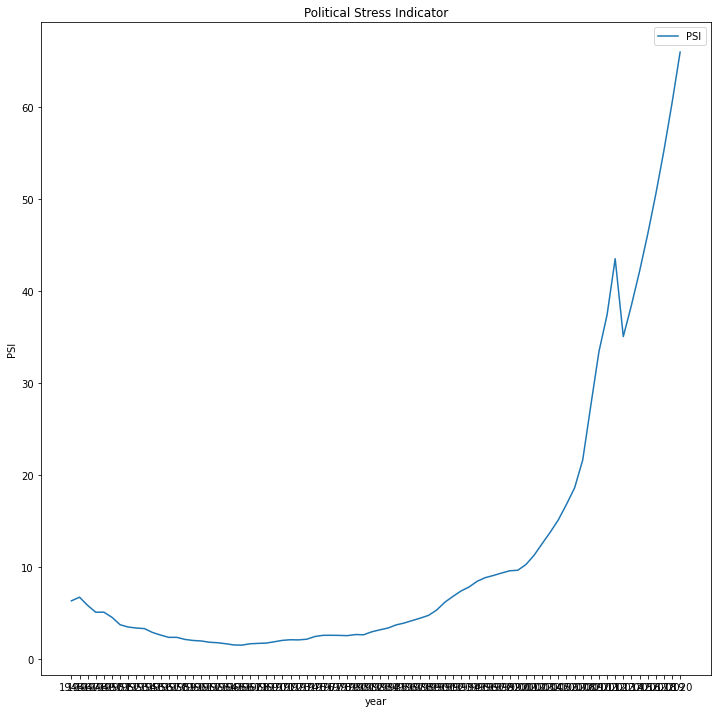

In [297]:
data.plot(x='year', y='PSI', title='Political Stress Indicator',xlabel='year', ylabel='PSI', xticks=data['year'], figsize=(12,12) )